In [2]:
import torch
import matplotlib.pyplot as plt
from torch import nn
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split


In [70]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'


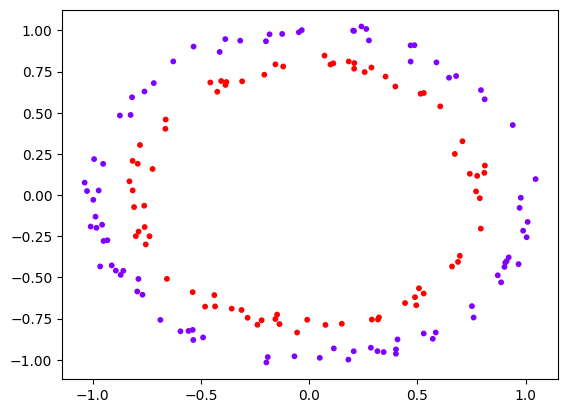

NameError: name 'device' is not defined

In [8]:
data = make_circles(n_samples=800, noise=0.03, random_state=23)

X, y = data

X_train, X_test, y_train, y_test = train_test_split(
	X, y, test_size=0.2, random_state=23
)

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.rainbow, s=10)
plt.show()

X_train = torch.tensor(X_train).to(device).type(torch.float)
y_train = torch.tensor(y_train).to(device).type(torch.float)
X_test = torch.tensor(X_test).to(device).type(torch.float)
y_test = torch.tensor(y_test).to(device).type(torch.float)


In [72]:
# create custom class
class CircleClassifierV1(nn.Module):
	def __init__(self) -> None:
		super().__init__()

		# create linear layers
		self.layer1 = nn.Linear(in_features=2, out_features=5)
		self.layer2 = nn.Linear(in_features=5, out_features=5)
		self.layer3 = nn.Linear(in_features=5, out_features=1)
		self.relu = nn.ReLU()


	def forward(self, X: torch.Tensor) -> torch.Tensor:
		return self.layer3(
			self.relu(
				self.layer2(
					self.relu(
						self.layer1(X)
					)
				)
			)
		)


model = CircleClassifierV1().to(device)


In [73]:
def accuracy(y_pred, y_test) -> float:
	y_pred = y_pred.to(device)
	y_test = y_test.to(device)
	return sum(y_pred == y_test) / len(y_test)


In [74]:
# pick loss and optimizer
loss_fn = nn.BCEWithLogitsLoss() # has sigmoid built-in
# sigmoid will convert the logits to probability distributions for binary classifications
# should use softmax for multiclass classification

optimizer = torch.optim.SGD(params=model.parameters(), lr=1e-1)


In [202]:
torch.manual_seed(23)
torch.cuda.manual_seed(23)

epochs = 10000

for epoch in range(1, epochs+1):
	model.train()


	y_logits = model(X_train).squeeze() # to remove the dimensions with size 1
	y_pred = torch.round(torch.sigmoid(y_logits)) # convert it to labels
	# 0 for sigmoid(logit) < 0.5
	# 1 for sigmoid(logit) > 0.5


	# for a loss function of type BCELoss, we should pass in a prediction probablity
	# loss = loss_fn(sigmoid(logit), y_train)

	# for a loss function of type BCEWithLogitsLoss, we should pass in logits
	loss = loss_fn(y_logits, y_train)

	optimizer.zero_grad()

	loss.backward()

	optimizer.step()

	model.eval()
	with torch.inference_mode():
		y_logits_test = model(X_test).squeeze() # get logits/raw output of the network
		y_pred_test = torch.round(torch.sigmoid(y_logits_test)) # convert to labels
		loss_test = loss_fn(y_pred_test, y_test)

	if epoch % 10 == 0:
		acc: float = accuracy(y_pred_test, y_test)*100
		print(f'{epoch = :0>4} ->\t{loss = :.4f}\t{loss_test = :.4f}\ttest accuracy = {acc:.2f}%')


epoch = 0010 ->	loss = 0.0123	loss_test = 0.5213	test accuracy = 99.38%
epoch = 0020 ->	loss = 0.0123	loss_test = 0.5213	test accuracy = 99.38%
epoch = 0030 ->	loss = 0.0123	loss_test = 0.5213	test accuracy = 99.38%
epoch = 0040 ->	loss = 0.0123	loss_test = 0.5213	test accuracy = 99.38%
epoch = 0050 ->	loss = 0.0123	loss_test = 0.5213	test accuracy = 99.38%
epoch = 0060 ->	loss = 0.0123	loss_test = 0.5213	test accuracy = 99.38%
epoch = 0070 ->	loss = 0.0123	loss_test = 0.5213	test accuracy = 99.38%
epoch = 0080 ->	loss = 0.0123	loss_test = 0.5213	test accuracy = 99.38%
epoch = 0090 ->	loss = 0.0123	loss_test = 0.5213	test accuracy = 99.38%
epoch = 0100 ->	loss = 0.0123	loss_test = 0.5213	test accuracy = 99.38%
epoch = 0110 ->	loss = 0.0123	loss_test = 0.5213	test accuracy = 99.38%
epoch = 0120 ->	loss = 0.0123	loss_test = 0.5213	test accuracy = 99.38%
epoch = 0130 ->	loss = 0.0123	loss_test = 0.5213	test accuracy = 99.38%
epoch = 0140 ->	loss = 0.0123	loss_test = 0.5213	test accuracy =

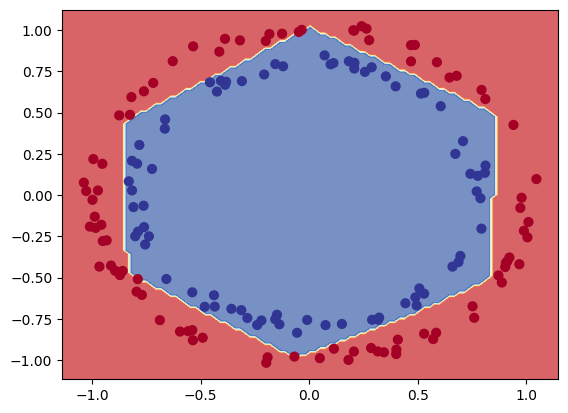

In [206]:
from helper_functions import plot_decision_boundary
plot_decision_boundary(model=model, X=X_test, y=y_test)
